In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='1',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_1.get_object(Bucket='1',Key='fhrw-4uyv.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()

Bucket='1'

In [2]:
df_data_0.to_pickle('./df_raw.pkl')

client_1.upload_file('./df_raw.pkl',Bucket,'df_raw_cos.pkl')

client_1.download_file(Bucket,Key='df_raw_cos.pkl',Filename='./df_raw_local.pkl')

df_NY = pd.read_pickle('./df_raw_local.pkl')

In [3]:

body = client_1.get_object(Bucket='1',Key='BX_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_1 = pd.read_csv(body)
df_data_1.head()

Bucket='1'

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_data_1.to_pickle('./df_raw.pkl')

client_1.upload_file('./df_raw.pkl',Bucket,'df_raw_cos.pkl')

client_1.download_file(Bucket,Key='df_raw_cos.pkl',Filename='./df_raw_local.pkl')

df_data_2 = pd.read_pickle('./df_raw_local.pkl')

In [5]:
df_NY.head(3)

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2020-01-15T21:20:00.000,45397440,HEAT/HOT WATER,10456.0,1250 FRANKLIN AVENUE,FRANKLIN AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.830871,-73.902850,NaN,RESIDENTIAL BUILDING,Open
1,2020-01-15T10:54:04.000,45396490,GENERAL,10039.0,208 WEST 151 STREET,WEST 151 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.825551,-73.936620,NaN,RESIDENTIAL BUILDING,Open
2,2020-01-15T19:45:27.000,45397525,HEAT/HOT WATER,10039.0,247 WEST 145 STREET,WEST 145 STREET,ADDRESS,NEW YORK,The complaint you filed is a duplicate of a co...,MANHATTAN,40.822237,-73.940471,NaN,RESIDENTIAL BUILDING,Open


In [6]:
df_data_2=df_data_2[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 
                    'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1', 
                    'ZipCode', 'YCoord', 'XCoord']]
df_data_2=df_data_2.set_index(df_data_2['Address'])
df_data_2.dropna(inplace=True)
df_data_2.drop('Address', axis=1,inplace=True)
df_data_2.head(3)

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
Address,,,,,,,,,,,,,,,,,,,
122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0
126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0
138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0


In [7]:
df_NY_HEAT=df_NY.loc[df_NY['complaint_type'] == 'HEAT/HOT WATER']
df_BX_HEAT=df_NY_HEAT.loc[df_NY['borough'] == 'BRONX'][['incident_address','incident_zip']]
df_BX_HEAT.head(3)

,incident_address,incident_zip
0,1250 FRANKLIN AVENUE,10456.0
4,3345 DECATUR AVENUE,10467.0
8,2301 TURNBULL AVENUE,10473.0


In [8]:
df_BX_HEAT_count=df_BX_HEAT['incident_address'].value_counts()
df_BX_HEAT_count=df_BX_HEAT_count.rename_axis('incident_address').reset_index(name='counts')
df_BX_HEAT_count.head()
df_BX_HEAT_count=df_BX_HEAT_count.set_index(df_BX_HEAT_count['incident_address'])
df_BX_HEAT_count.drop('incident_address', axis=1,inplace=True)
df_BX_HEAT_count.head(3)

,counts
incident_address,
1025 BOYNTON AVENUE,5220
2090 EAST TREMONT AVENUE,3605
2968 PERRY AVENUE,2429


In [9]:
df_BX_HEAT_data=df_data_2.join(df_BX_HEAT_count, on='Address', how='left', lsuffix='', rsuffix='', sort=False)
df_BX_HEAT_data.head(3)

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,counts
Address,,,,,,,,,,,,,,,,,,,,
122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0,NaN
126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0,NaN
138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0,NaN


In [10]:
import numpy as np
a = np.isnan(df_BX_HEAT_data['counts'])
df_BX_HEAT_data['counts'][a] = 0
df_BX_HEAT_data.head(3)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,counts
Address,,,,,,,,,,,,,,,,,,,,
122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0,0.0
126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0,0.0
138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0,0.0


In [11]:
df_BX_HEAT_data[df_BX_HEAT_data['counts']!=0]=1
df_BX_HEAT_data.rename(columns={'counts':'occur'},inplace=True)
df_BX_HEAT_data.corr()

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,occur
BldgArea,1.000000,0.209891,0.231653,0.022346,0.063028,0.053145,0.169061,0.221549,0.557963,0.301755,0.211487,0.879235,0.045373,0.172826,0.039217,0.085599,0.035474,0.033322,0.034333,-0.035252
BldgDepth,0.209891,1.000000,0.151134,-0.119302,0.373156,0.047142,0.030621,0.471826,0.087574,0.403613,0.202374,0.089175,0.199743,0.193277,0.615653,0.262245,0.535989,0.526945,0.533122,-0.536083
BuiltFAR,0.231653,0.151134,1.000000,0.041138,0.147210,0.098465,-0.006870,-0.027832,0.073244,0.299179,0.064464,0.197632,0.159910,0.472518,0.044331,0.082249,-0.021344,-0.025698,-0.023878,0.021204
CommFAR,0.022346,-0.119302,0.041138,1.000000,-0.019241,-0.060828,0.002798,-0.210579,-0.029845,-0.266937,0.042238,-0.018845,-0.033991,0.098291,-0.511902,0.061427,-0.528863,-0.539061,-0.532315,0.528708
FacilFAR,0.063028,0.373156,0.147210,-0.019241,1.000000,-0.007973,-0.007134,0.199295,-0.013703,0.270657,0.053160,0.038087,0.822513,0.084968,0.313795,0.155644,0.402381,0.380782,0.390706,-0.402997
Lot,0.053145,0.047142,0.098465,-0.060828,-0.007973,1.000000,0.005869,0.085897,0.116473,0.117090,0.026448,0.044008,-0.017585,0.080595,0.093764,0.015182,0.108831,0.120698,0.106193,-0.108739
LotArea,0.169061,0.030621,-0.006870,0.002798,-0.007134,0.005869,1.000000,0.298280,0.336418,0.030377,0.055967,0.067650,-0.011010,0.012545,0.007932,0.030751,0.011947,0.011746,0.011818,-0.011782
LotDepth,0.221549,0.471826,-0.027832,-0.210579,0.199295,0.085897,0.298280,1.000000,0.210718,0.257681,0.177449,0.112058,0.062561,0.091990,0.439206,0.130530,0.530159,0.525628,0.529538,-0.530122
NumBldgs,0.557963,0.087574,0.073244,-0.029845,-0.013703,0.116473,0.336418,0.210718,1.000000,0.125569,0.039630,0.469664,-0.030604,0.050638,0.091624,0.038652,0.045156,0.044230,0.045932,-0.044820
NumFloors,0.301755,0.403613,0.299179,-0.266937,0.270657,0.117090,0.030377,0.257681,0.125569,1.000000,0.102262,0.287048,0.230899,0.019851,0.513677,0.130521,0.369286,0.368935,0.366900,-0.369387


In [12]:
df_BX_HEAT_data[['BldgDepth','CommFAR','LotDepth','NumFloors','YearBuilt','occur']].corr()

,BldgDepth,CommFAR,LotDepth,NumFloors,YearBuilt,occur
BldgDepth,1.000000,-0.119302,0.471826,0.403613,0.615653,-0.536083
CommFAR,-0.119302,1.000000,-0.210579,-0.266937,-0.511902,0.528708
LotDepth,0.471826,-0.210579,1.000000,0.257681,0.439206,-0.530122
NumFloors,0.403613,-0.266937,0.257681,1.000000,0.513677,-0.369387
YearBuilt,0.615653,-0.511902,0.439206,0.513677,1.000000,-0.873848
occur,-0.536083,0.528708,-0.530122,-0.369387,-0.873848,1.000000


In [13]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 10))
plt.show()

<Figure size 1000x1000 with 0 Axes>

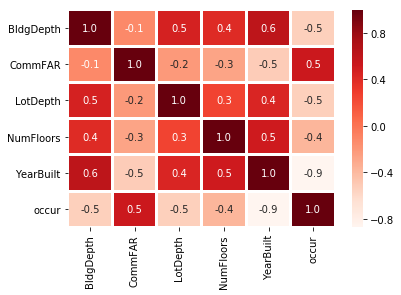

In [14]:
import seaborn as sns    
sns.heatmap(data = df_BX_HEAT_data[['BldgDepth','CommFAR','LotDepth','NumFloors','YearBuilt','occur']].corr(), annot=True, 
fmt = '.1f', linewidths=2, cmap='Reds')

In [15]:
data=df_BX_HEAT_data[['BldgDepth','CommFAR','LotDepth','NumFloors','YearBuilt','occur']]
data.head(3)

,BldgDepth,CommFAR,LotDepth,NumFloors,YearBuilt,occur
Address,,,,,,
122 BRUCKNER BOULEVARD,0.0,5.0,200.0,0.0,0,0.0
126 BRUCKNER BOULEVARD,16.0,5.0,100.0,1.0,1931,0.0
138 BRUCKNER BOULEVARD,200.0,5.0,200.0,2.0,1931,0.0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

In [17]:
x=data[['BldgDepth','CommFAR','LotDepth','NumFloors','YearBuilt']]
y=data['occur']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=5)

In [18]:
lr=LogisticRegression().fit(x_train,y_train)
y_pred=lr.predict(x_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
metrics.accuracy_score(y_test, y_pred)

0.9991146354607745

In [20]:
pd.crosstab(y_test, y_pred)

col_0,0.0,1.0
occur,,
0.0,21820,23
1.0,0,4135


In [21]:
y_total_pred=lr.predict(x)

In [22]:
metrics.accuracy_score(y, y_total_pred)

0.9992031504428867